In [69]:
# Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import gc


# Ïù∏ÏΩîÎçî Ï∂îÍ∞Ä
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#ÏÉÅÏàòÌï≠Ï∂îÍ∞Ä
from statsmodels.tools.tools import add_constant
# Ïπ¥Ïù¥Ï†úÍ≥±, ANOVA
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
#Turkeyhsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [4]:
# parquet ÌååÏùº Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò®Îã§.
# x Í∞íÏúºÎ°ú Ïì∏ Îç∞Ïù¥ÌÑ∞ 
df1_train = pd.read_parquet('open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201807_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet')
df2_train = pd.read_parquet('open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201808_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet')
df3_train = pd.read_parquet('open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201809_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet')
df4_train = pd.read_parquet('open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201810_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet')
df5_train = pd.read_parquet('open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201811_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet')
df6_train = pd.read_parquet('open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201812_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet')

combined_df = pd.concat([df1_train, df2_train, df3_train, df4_train, df5_train, df6_train], axis=0, ignore_index=True)
combined_df

Í∏∞Ï§ÄÎÖÑÏõî            ID  ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°  Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°  CAÌïúÎèÑÍ∏àÏï°  ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  \
0        201807  TRAIN_000000       0     19354    7270          0         0   
1        201807  TRAIN_000001       0      9996    5718      41996     90611   
2        201807  TRAIN_000002       0     88193   35207          0         0   
3        201807  TRAIN_000003       0     19062    6531          0         0   
4        201807  TRAIN_000004       0    177222   47149      48000    155020   
...         ...           ...     ...       ...     ...        ...       ...   
2399995  201812  TRAIN_399995       0     20070   10167          0     54445   
2399996  201812  TRAIN_399996       0     84217   31159          0    156800   
2399997  201812  TRAIN_399997       0     52612   19429          0         0   
2399998  201812  TRAIN_399998       0     10002    4228      90004    180906   
2399999  201812  TRAIN_399999       0     86094   25133          0         0   

         CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ...  Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M  ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò  \
0        22.995207  18.254978     17.264967  ...           0        0Ìöå   
1        14.793821  14.834873     10.622446  ...           0        0Ìöå   
2        22.014276  17.875321     17.155829  ...           0        0Ìöå   
3        22.998014  22.999453     19.293674  ...           0        0Ìöå   
4        14.661948  10.897410     10.654587  ...           0        0Ìöå   
...            ...        ...           ...  ...         ...       ...   
2399995  15.243670  11.900516     10.545876  ...           0        0Ìöå   
2399996  14.843464  15.652063     11.102726  ...           0        0Ìöå   
2399997  17.038599  17.966213     13.278475  ...           0        0Ìöå   
2399998  15.182880  11.901089     10.594124  ...           0        0Ìöå   
2399999  14.841102  15.287120     11.406823  ...           0        0Ìöå   

         ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò  ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî  ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M  ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M  \
0               0           3          3             0             0   
1               0           3          3             0             0   
2               0           3          3             0             0   
3               0           3          3             0             0   
4               0           3          3             0             0   
...           ...         ...        ...           ...           ...   
2399995         0           3          3             0             0   
2399996         0           3          3             0             0   
2399997         0           3          3             0             0   
2399998         0           3          3             0             0   
2399999         0           3          3             0             0   

         ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M  ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R3M  rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº  
0                   0             0    99999999  
1                   0             0         322  
2                   0             0        2378  
3                   0             0    99999999  
4                   0             0    99999999  
...               ...           ...         ...  
2399995             0             0    99999999  
2399996             0             0    99999999  
2399997             0             0    99999999  
2399998             0             0    99999999  
2399999             0             0    99999999  

[2400000 rows x 42 columns]

In [5]:
# Í≤∞Í≥ºÎç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò®Îã§. 
segment_df = pd.read_csv('Segment.csv')
segment_df

Í∏∞Ï§ÄÎÖÑÏõî            ID Segment
0        201807  TRAIN_000000       D
1        201807  TRAIN_000001       E
2        201807  TRAIN_000002       C
3        201807  TRAIN_000003       D
4        201807  TRAIN_000004       E
...         ...           ...     ...
2399995  201812  TRAIN_399995       E
2399996  201812  TRAIN_399996       D
2399997  201812  TRAIN_399997       C
2399998  201812  TRAIN_399998       E
2399999  201812  TRAIN_399999       E

[2400000 rows x 3 columns]

In [6]:
# ÎëòÏùÑ Ìï©Ï≥êÏ§ÄÎã§. 
# IDÎäî Ï§ëÎ≥µÎêòÎäî Í∞íÏù¥ concatÏùò ÏòÅÌñ•ÏúºÎ°ú 6Í∞úÏî© Ï°¥Ïû¨ÌïòÎØÄÎ°ú
# Í∏∞Ï§ÄÎÖÑÏõîÏùÑ Ïù¥Ïö©Ìï¥ Ï∂îÍ∞ÄÏ†ÅÏù∏ Í∏∞Ï§ÄÏùÑ ÎßåÎì§Ïñ¥Ï§ÄÎã§. 
all_df = combined_df.merge(segment_df, on=['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'], how='left')
all_df

Í∏∞Ï§ÄÎÖÑÏõî            ID  ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°  Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°  CAÌïúÎèÑÍ∏àÏï°  ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  \
0        201807  TRAIN_000000       0     19354    7270          0         0   
1        201807  TRAIN_000001       0      9996    5718      41996     90611   
2        201807  TRAIN_000002       0     88193   35207          0         0   
3        201807  TRAIN_000003       0     19062    6531          0         0   
4        201807  TRAIN_000004       0    177222   47149      48000    155020   
...         ...           ...     ...       ...     ...        ...       ...   
2399995  201812  TRAIN_399995       0     20070   10167          0     54445   
2399996  201812  TRAIN_399996       0     84217   31159          0    156800   
2399997  201812  TRAIN_399997       0     52612   19429          0         0   
2399998  201812  TRAIN_399998       0     10002    4228      90004    180906   
2399999  201812  TRAIN_399999       0     86094   25133          0         0   

         CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ...  ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò  ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò  \
0        22.995207  18.254978     17.264967  ...        0Ìöå         0   
1        14.793821  14.834873     10.622446  ...        0Ìöå         0   
2        22.014276  17.875321     17.155829  ...        0Ìöå         0   
3        22.998014  22.999453     19.293674  ...        0Ìöå         0   
4        14.661948  10.897410     10.654587  ...        0Ìöå         0   
...            ...        ...           ...  ...       ...       ...   
2399995  15.243670  11.900516     10.545876  ...        0Ìöå         0   
2399996  14.843464  15.652063     11.102726  ...        0Ìöå         0   
2399997  17.038599  17.966213     13.278475  ...        0Ìöå         0   
2399998  15.182880  11.901089     10.594124  ...        0Ìöå         0   
2399999  14.841102  15.287120     11.406823  ...        0Ìöå         0   

         ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî  ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M  ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M  ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M  \
0                 3           3            0             0             0   
1                 3           3            0             0             0   
2                 3           3            0             0             0   
3                 3           3            0             0             0   
4                 3           3            0             0             0   
...             ...         ...          ...           ...           ...   
2399995           3           3            0             0             0   
2399996           3           3            0             0             0   
2399997           3           3            0             0             0   
2399998           3           3            0             0             0   
2399999           3           3            0             0             0   

         ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R3M  rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº  Segment  
0                   0    99999999        D  
1                   0         322        E  
2                   0        2378        C  
3                   0    99999999        D  
4                   0    99999999        E  
...               ...         ...      ...  
2399995             0    99999999        E  
2399996             0    99999999        D  
2399997             0    99999999        C  
2399998             0    99999999        E  
2399999             0    99999999        E  

[2400000 rows x 43 columns]

In [123]:
all_df.isna().sum()

ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°                  0
Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°                0
CAÌïúÎèÑÍ∏àÏï°                  0
ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°               0
ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°                0
CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ               0
CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ               0
RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ            0
RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ          0
RVÏã†Ï≤≠ÏùºÏûê            1951236
RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®                 0
RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®                0
ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M           0
ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M           0
ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî              0
Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M           0
Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M           0
Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî              0
ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M             0
ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M             0
ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî                0
ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°                0
ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°              0
Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä                 0
ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎ

### Î≥ÄÏàòÍ∞Ñ Í¥ÄÍ≥ÑÌååÏïÖ
Anova -> ETAÏ†úÍ≥±
Ïπ¥Ïù¥Ï†úÍ≥± -> ÌÅ¨Î†àÏù¥Î®∏Ïä§V

In [65]:
# ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÏàòÏπòÌòï, Î≤îÏ£ºÌòï Ïª¨Îüº
categorical_cols = [
    'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M',
    'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M',
    'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
    'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M',
    'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M',
    'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
    'Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä',
    'ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°',
    'RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä',
    'ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä',
    'ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M',
    'Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M',
    'ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M',
    'ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M',
    'ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
    'ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°',
    'ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°',
    'ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò',
    'ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò',
    'ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî',
    'ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî',
    'ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M',
    'ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M',
    'ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M',
    'rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº'
]


numerical_cols = ['ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°',
 'CAÌïúÎèÑÍ∏àÏï°',
 'ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°',
 'ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°',
 'CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ','RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®',
 'RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M']

# Í≥ÑÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

def eta_squared(anova_ss_between, total_ss):
    return anova_ss_between / total_ss if total_ss != 0 else np.nan

# Í≤∞Í≥º Ï†ÄÏû•
anova = []
chi = []

for col in numerical_cols:
    if col not in all_df.columns:
        continue
    data = all_df[[col, 'Segment']].dropna()
    groups = [data[data['Segment'] == val][col] for val in data['Segment'].unique()]
    try:
        stat = f_oneway(*groups).statistic
        ss_between = sum([(g.mean() - data[col].mean())**2 * len(g) for g in groups])
        ss_total = sum((data[col] - data[col].mean())**2)
        eta2 = eta_squared(ss_between, ss_total)
        anova.append({'Î≥ÄÏàò': col, 'Ïú†Ìòï': 'ÏàòÏπòÌòï', 'Í≥ÑÏàòÏ¢ÖÎ•ò': 'Eta¬≤', 'ÏÉÅÍ¥ÄÍ≥ÑÏàò': eta2})
    except:
        continue

for col in categorical_cols:
    if col not in all_df.columns:
        continue
    contingency = pd.crosstab(all_df[col], all_df['Segment'])
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        try:
            v = cramers_v(contingency)
            chi.append({'Î≥ÄÏàò': col, 'Ïú†Ìòï': 'Î≤îÏ£ºÌòï', 'Í≥ÑÏàòÏ¢ÖÎ•ò': "Cram√©r's V", 'ÏÉÅÍ¥ÄÍ≥ÑÏàò': v})
        except:
            continue

# Í≤∞Í≥º Ï†ïÎ¶¨ Î∞è Ï†ïÎ†¨
result_df1 = pd.DataFrame(anova)
result_df2 = pd.DataFrame(chi)

if 'ÏÉÅÍ¥ÄÍ≥ÑÏàò' in result_df1.columns:
    result_df1 = result_df1.sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', ascending=False).reset_index(drop=True)

if 'ÏÉÅÍ¥ÄÍ≥ÑÏàò' in result_df2.columns:
    result_df2 = result_df2.sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', ascending=False).reset_index(drop=True)

# Í≤∞Í≥º Ï∂úÎ†•
display(result_df1)
display(result_df2)

Î≥ÄÏàò   Ïú†Ìòï  Í≥ÑÏàòÏ¢ÖÎ•ò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0         Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï  Eta¬≤  0.093356
1     Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M  ÏàòÏπòÌòï  Eta¬≤  0.092755
2     Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M  ÏàòÏπòÌòï  Eta¬≤  0.092747
3           CAÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï  Eta¬≤  0.085807
4        CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ÏàòÏπòÌòï  Eta¬≤  0.014079
5           ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï  Eta¬≤  0.011621
6   RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ÏàòÏπòÌòï  Eta¬≤  0.009658
7        ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï  Eta¬≤  0.008916
8     RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ÏàòÏπòÌòï  Eta¬≤  0.005760
9          RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®  ÏàòÏπòÌòï  Eta¬≤  0.004578
10        ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï  Eta¬≤  0.002692
11       CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ÏàòÏπòÌòï  Eta¬≤  0.001426
12        RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®  ÏàòÏπòÌòï  Eta¬≤  0.001033

Î≥ÄÏàò   Ïú†Ìòï        Í≥ÑÏàòÏ¢ÖÎ•ò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0        ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  Î≤îÏ£ºÌòï  Cram√©r's V  0.141612
1      ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°  Î≤îÏ£ºÌòï  Cram√©r's V  0.136274
2     ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.078676
3      rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº  Î≤îÏ£ºÌòï  Cram√©r's V  0.070303
4     ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.070096
5        RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä  Î≤îÏ£ºÌòï  Cram√©r's V  0.044128
6         Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä  Î≤îÏ£ºÌòï  Cram√©r's V  0.038021
7      Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.029208
8   Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.028309
9        ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.027772
10  ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä  Î≤îÏ£ºÌòï  Cram√©r's V  0.023012
11   ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  Î≤îÏ£ºÌòï  Cram√©r's V  0.021801
12     Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M  Î≤îÏ£ºÌòï  Cram√©r's V  0.020022
13  Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.019506
14  ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.004574
15  ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.004437
16   ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M  Î≤îÏ£ºÌòï  Cram√©r's V  0.003142
17       ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò  Î≤îÏ£ºÌòï  Cram√©r's V  0.002136
18       ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò  Î≤îÏ£ºÌòï  Cram√©r's V  0.002076
19     ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.001643
20     ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.001467
21   ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M  Î≤îÏ£ºÌòï  Cram√©r's V  0.001319
22   ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M  Î≤îÏ£ºÌòï  Cram√©r's V  0.001096
23     ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.000920
24   ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M  Î≤îÏ£ºÌòï  Cram√©r's V  0.000322

In [ ]:
pd.to_excel

### corr ÏÉÅÍ¥ÄÍ≥ÑÏàò

In [11]:
# all_dfÏóêÏÑú Í∏∞Ï§ÄÎÖÑÏõî, ID Ïª¨ÎüºÏùÄ Ï†úÍ±∞ÌïúÎã§. 
all_df = all_df.drop(['Í∏∞Ï§ÄÎÖÑÏõî','ID'], axis=1)
# Ïª¨ÎüºÎì§ÏùÑ Î¶¨Ïä§Ìä∏Ïóê Îã¥ÏïÑ ÌôïÏù∏ÌïúÎã§
column_list = all_df.columns.tolist()
column_list

['ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°',
 'CAÌïúÎèÑÍ∏àÏï°',
 'ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°',
 'ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°',
 'CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'RVÏã†Ï≤≠ÏùºÏûê',
 'RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®',
 'RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®',
 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M',
 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M',
 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M',
 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M',
 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
 'ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M',
 'ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M',
 'ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
 'ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°',
 'ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°',
 'Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä',
 'ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°',
 'RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä',
 'ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M',
 'ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M',
 'Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M',
 'ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò',
 'ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò',
 'ÌïúÎèÑÏã¨

In [12]:
# AÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Îì±Í∏âÏùº Í≤ÉÏù¥Îùº Ï∂îÏ∏°ÌïòÍ≥† ÏÑ∏Í∑∏Î®ºÌä∏Îßå LabelEncoderÍ∞Ä ÏïÑÎãå mapÏúºÎ°ú ÏßÑÌñâ

segment_order = {'E': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 4}
all_df['Segment_e'] = all_df['Segment'].map(segment_order)

# Ïù∏ÏΩîÎî© ÏßÑÌñâ
# Ïù∏ÏΩîÎî©Ìï† Ïª¨ÎüºÎßå ÏÑ†ÌÉù
encoder = LabelEncoder()
all_df['ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò'] = encoder.fit_transform(all_df['ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò'])
all_df['Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä'] = encoder.fit_transform(all_df['Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä'])
all_df['ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M'] = encoder.fit_transform(all_df['ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M'])
all_df['ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M'] = encoder.fit_transform(all_df['ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M'])
all_df['RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä'] = encoder.fit_transform(all_df['RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä'])



In [13]:
print(all_df['Segment_e'].unique())

[1 0 2 4 3]


In [127]:
all_df['ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R3M'].value_counts()

ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R3M
0    2400000
Name: count, dtype: int64

In [101]:

# Î¶¨Ïä§Ìä∏Î•º ÎÇòÎà†Ï§ÄÎã§. 
### ÏàòÏπòÌòï
column1 = ['ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°',
 'CAÌïúÎèÑÍ∏àÏï°',
 'ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°',
 'ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°',
 'CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ']
          
column2 = ['RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®',
 'RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M']

### Î≤îÏ£ºÌòï

column3 = ['ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M',
 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M',
 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M',
 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M',
 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî']

column4 = ['Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä',
 'ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°',
 'RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä',
 'ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä',
 'ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M',
 'Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M']

column5 = ['ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M',
 'ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M',
 'ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
 'ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°',
 'ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°']

column6 = ['ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò',
 'ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò',
 'ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî',
 'ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî',
 'ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M',
 'ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M',
 'ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M',
 'rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº']



- ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R3M Ïª¨ÎüºÏùò Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Îëê 0Ïù¥ÎùºÏÑú Ï†úÍ±∞ÌñàÎã§

In [103]:
# ÎπÑÍµêÌï† Ï¢ÖÏÜçÎ≥ÄÏàò
target = 'Segment_e'
# Í≤∞Í≥ºÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏ 
corr_result = []
# Î∞òÎ≥µ
for col in column1:
    if col in all_df.columns:
        corr = all_df[col].corr(all_df[target])
        corr_result.append({'Î≥ÄÏàò': col, 'ÏÉÅÍ¥ÄÍ≥ÑÏàò': corr})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïúÎã§ 
result_df3 = pd.DataFrame(corr_result).sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', key=abs, ascending=False).reset_index(drop=True)

display(result_df3)

Î≥ÄÏàò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0   Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°  0.304435
1     CAÌïúÎèÑÍ∏àÏï°  0.292502
2  CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  0.118189
3     ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°  0.107069
4  ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  0.094197
5   ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  0.050272
6  CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  0.037266

In [104]:
# ÎπÑÍµêÌï† Ï¢ÖÏÜçÎ≥ÄÏàò
target = 'Segment_e'
# Í≤∞Í≥ºÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏ 
corr_result = []
# Î∞òÎ≥µ
for col in column2:
    if col in all_df.columns:
        corr = all_df[col].corr(all_df[target])
        corr_result.append({'Î≥ÄÏàò': col, 'ÏÉÅÍ¥ÄÍ≥ÑÏàò': corr})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïúÎã§ 
result_df4 = pd.DataFrame(corr_result).sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', key=abs, ascending=False).reset_index(drop=True)

display(result_df4)

Î≥ÄÏàò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0    Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M  0.303262
1    Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M  0.303258
2  RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  0.096870
3    RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  0.073838
4         RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®  0.054575
5        RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®  0.031680

In [105]:
# ÎπÑÍµêÌï† Ï¢ÖÏÜçÎ≥ÄÏàò
target = 'Segment_e'
# Í≤∞Í≥ºÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏ 
corr_result = []
# Î∞òÎ≥µ
for col in column3:
    if col in all_df.columns:
        corr = all_df[col].corr(all_df[target])
        corr_result.append({'Î≥ÄÏàò': col, 'ÏÉÅÍ¥ÄÍ≥ÑÏàò': corr})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïúÎã§ 
result_df5 = pd.DataFrame(corr_result).sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', key=abs, ascending=False).reset_index(drop=True)

display(result_df5)

Î≥ÄÏàò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0     Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  0.044601
1  Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M -0.037438
2  ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M  0.006141
3  ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M  0.005818
4  Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M -0.003853
5     ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî -0.002105

In [106]:
# ÎπÑÍµêÌï† Ï¢ÖÏÜçÎ≥ÄÏàò
target = 'Segment_e'
# Í≤∞Í≥ºÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏ 
corr_result = []
# Î∞òÎ≥µ
for col in column4:
    if col in all_df.columns:
        corr = all_df[col].corr(all_df[target])
        corr_result.append({'Î≥ÄÏàò': col, 'ÏÉÅÍ¥ÄÍ≥ÑÏàò': corr})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïúÎã§ 
result_df6 = pd.DataFrame(corr_result).sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', key=abs, ascending=False).reset_index(drop=True)

display(result_df6)

Î≥ÄÏàò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0       RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä -0.047867
1        Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä  0.036400
2  ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä -0.019205
3     Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M  0.013670
4   ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï° -0.011388
5   ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M -0.002992

In [108]:
# ÎπÑÍµêÌï† Ï¢ÖÏÜçÎ≥ÄÏàò
target = 'Segment_e'
# Í≤∞Í≥ºÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏ 
corr_result = []
# Î∞òÎ≥µ
for col in column5:
    if col in all_df.columns:
        corr = all_df[col].corr(all_df[target])
        corr_result.append({'Î≥ÄÏàò': col, 'ÏÉÅÍ¥ÄÍ≥ÑÏàò': corr})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïúÎã§ 
result_df7 = pd.DataFrame(corr_result).sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', key=abs, ascending=False).reset_index(drop=True)

display(result_df7)

Î≥ÄÏàò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0  ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M  0.084180
1   ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°  0.064575
2  ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M  0.060724
3     ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  0.050764
4     ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî -0.039390

In [109]:
# ÎπÑÍµêÌï† Ï¢ÖÏÜçÎ≥ÄÏàò
target = 'Segment_e'
# Í≤∞Í≥ºÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏ 
corr_result = []
# Î∞òÎ≥µ
for col in column6:
    if col in all_df.columns:
        corr = all_df[col].corr(all_df[target])
        corr_result.append({'Î≥ÄÏàò': col, 'ÏÉÅÍ¥ÄÍ≥ÑÏàò': corr})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨ÌïúÎã§ 
result_df8 = pd.DataFrame(corr_result).sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', key=abs, ascending=False).reset_index(drop=True)

display(result_df8)

Î≥ÄÏàò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0    rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº -0.070155
1      ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò  0.001884
2      ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò  0.001737
3    ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî -0.001724
4  ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M -0.001308
5    ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî -0.001212
6  ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M -0.001072
7  ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M -0.000298

In [110]:
corr_df = pd.concat(
    [result_df3, result_df4, result_df5, result_df6, result_df7, result_df8],
    axis=0,
    ignore_index=True
)

In [112]:
corr_result_df = corr_df.sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', ascending=False).reset_index(drop=True)
corr_result_df

Î≥ÄÏàò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0         Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°  0.304435
1     Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M  0.303262
2     Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M  0.303258
3           CAÌïúÎèÑÍ∏àÏï°  0.292502
4        CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  0.118189
5           ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°  0.107069
6   RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  0.096870
7        ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  0.094197
8      ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M  0.084180
9     RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  0.073838
10      ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°  0.064575
11     ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M  0.060724
12         RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®  0.054575
13        ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  0.050764
14        ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  0.050272
15      Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  0.044601
16       CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  0.037266
17         Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä  0.036400
18        RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®  0.031680
19      Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M  0.013670
20   ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M  0.006141
21   ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M  0.005818
22        ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò  0.001884
23        ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò  0.001737
24    ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M -0.000298
25    ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M -0.001072
26      ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî -0.001212
27    ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M -0.001308
28      ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî -0.001724
29      ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî -0.002105
30    ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M -0.002992
31   Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M -0.003853
32    ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï° -0.011388
33   ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä -0.019205
34   Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M -0.037438
35        ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî -0.039390
36        RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä -0.047867
37      rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº -0.070155

In [119]:
result_AK = pd.concat(
    [result_df1, result_df2],
    axis=0,
    ignore_index=True
)
display(result_AK)

Î≥ÄÏàò   Ïú†Ìòï        Í≥ÑÏàòÏ¢ÖÎ•ò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0         Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï        Eta¬≤  0.093356
1     Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M  ÏàòÏπòÌòï        Eta¬≤  0.092755
2     Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M  ÏàòÏπòÌòï        Eta¬≤  0.092747
3           CAÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï        Eta¬≤  0.085807
4        CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ÏàòÏπòÌòï        Eta¬≤  0.014079
5           ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï        Eta¬≤  0.011621
6   RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ÏàòÏπòÌòï        Eta¬≤  0.009658
7        ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï        Eta¬≤  0.008916
8     RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ÏàòÏπòÌòï        Eta¬≤  0.005760
9          RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®  ÏàòÏπòÌòï        Eta¬≤  0.004578
10        ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°  ÏàòÏπòÌòï        Eta¬≤  0.002692
11       CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ  ÏàòÏπòÌòï        Eta¬≤  0.001426
12        RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®  ÏàòÏπòÌòï        Eta¬≤  0.001033
13        ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  Î≤îÏ£ºÌòï  Cram√©r's V  0.141612
14      ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°  Î≤îÏ£ºÌòï  Cram√©r's V  0.136274
15     ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.078676
16      rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº  Î≤îÏ£ºÌòï  Cram√©r's V  0.070303
17     ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.070096
18        RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä  Î≤îÏ£ºÌòï  Cram√©r's V  0.044128
19         Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä  Î≤îÏ£ºÌòï  Cram√©r's V  0.038021
20      Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.029208
21   Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.028309
22        ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.027772
23   ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä  Î≤îÏ£ºÌòï  Cram√©r's V  0.023012
24    ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  Î≤îÏ£ºÌòï  Cram√©r's V  0.021801
25      Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M  Î≤îÏ£ºÌòï  Cram√©r's V  0.020022
26   Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.019506
27   ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.004574
28   ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.004437
29    ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M  Î≤îÏ£ºÌòï  Cram√©r's V  0.003142
30        ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò  Î≤îÏ£ºÌòï  Cram√©r's V  0.002136
31        ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò  Î≤îÏ£ºÌòï  Cram√©r's V  0.002076
32      ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.001643
33      ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.001467
34    ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M  Î≤îÏ£ºÌòï  Cram√©r's V  0.001319
35    ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M  Î≤îÏ£ºÌòï  Cram√©r's V  0.001096
36      ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.000920
37    ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M  Î≤îÏ£ºÌòï  Cram√©r's V  0.000322

In [129]:
### ÎÇ¥Î≥¥ÎÇ∏Îã§. 
result_AK.to_excel('Ïã†Ïö©Ï†ïÎ≥¥_ÏÉÅÍ¥ÄÍ≥ÑÏàò.xlsx', index=False)
corr_result_df.to_excel('Ïã†Ïö©Ï†ïÎ≥¥_Í≤ÄÏÇ¨.xlsx', index=False)


### VIF

In [23]:
# ÏÇ¨Ïö©Ìï† ÏàòÏπòÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏
features = ['ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°', 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°',
       'CAÌïúÎèÑÍ∏àÏï°', 'CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ', 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M',
       'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M']
features1 = ['ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°',
       'CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
       'CAÌïúÎèÑÍ∏àÏï°']
features2 = ['ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°', 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°',
       'CAÌïúÎèÑÍ∏àÏï°', 'CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ', 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M']
# ÎèÖÎ¶ΩÎ≥ÄÏàò Îç∞Ïù¥ÌÑ∞
X = all_df[features2]
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

        Feature        VIF
0         const  54.048339
1        ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°   1.019199
2      Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°  19.091935
3        CAÌïúÎèÑÍ∏àÏï°   7.152437
4     CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ   1.064573
5  Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M  16.313782


In [24]:
all_df[column5].corr()

ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M  ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M  ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°  \
ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M     1.000000     0.941650 -0.819507  0.032296    0.034784   
ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M     0.941650     1.000000 -0.763369  0.036540    0.040480   
ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî       -0.819507    -0.763369  1.000000  0.003790    0.001530   
ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°        0.032296     0.036540  0.003790  1.000000    0.963278   
ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°      0.034784     0.040480  0.001530  0.963278    1.000000   
Segment_e       0.060724     0.084180 -0.039390  0.050764    0.064575   

             Segment_e  
ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M   0.060724  
ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M   0.084180  
ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî     -0.039390  
ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°      0.050764  
ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°    0.064575  
Segment_e     1.000000

### CramersV

In [26]:
# Î≤îÏ£ºÌòï vs Î≤îÏ£ºÌòï: Cram√©r's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan  # ÏµúÏÜå 2x2 Ïù¥ÏÉÅ ÌïÑÏöî
    try:
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        return np.sqrt(phi2 / min(k - 1, r - 1))
    except:
        return np.nan


In [27]:
combined_categorical_cols = [
    'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M',
    'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M',
    'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
    'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M',
    'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M',
    'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
    'Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä',
    'ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°',
    'RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä',
    'ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä',
    'ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M',
    'Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M',
    'ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M',
    'ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M',
    'ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
    'ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°',
    'ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°',
    'ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò',
    'ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò',
    'ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî',
    'ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî',
    'ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M',
    'ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M',
    'ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M',
    'rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº'
]


numerical_cols = ['ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°',
 'CAÌïúÎèÑÍ∏àÏï°',
 'ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°',
 'ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°',
 'CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ','RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ',
 'RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®',
 'RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M',
 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M']

In [28]:
# Î≥ÄÏàò Ï†ïÏùò
segment_col = 'Segment'
categorical_cols = combined_categorical_cols  # Segment_e Ï†úÏô∏Îêú Î≤îÏ£ºÌòï Ïª¨Îüº Î¶¨Ïä§Ìä∏

results = []

for col in categorical_cols:
    if col == segment_col:
        continue

    coeff = cramers_v(all_df[segment_col], all_df[col])
    coef_type = "Cram√©r's V"
    var_type = "Î≤îÏ£ºÌòï"

    results.append({
        'Î≥ÄÏàò': col,
        'Ïú†Ìòï': var_type,
        'Í≥ÑÏàòÏ¢ÖÎ•ò': coef_type,
        'ÏÉÅÍ¥ÄÍ≥ÑÏàò': round(coeff, 6) if not pd.isna(coeff) else np.nan
    })

correlation_df = pd.DataFrame(results).sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', ascending=False)
display(correlation_df)



Î≥ÄÏàò   Ïú†Ìòï        Í≥ÑÏàòÏ¢ÖÎ•ò      ÏÉÅÍ¥ÄÍ≥ÑÏàò
15       ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  Î≤îÏ£ºÌòï  Cram√©r's V  0.141612
16     ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°  Î≤îÏ£ºÌòï  Cram√©r's V  0.136274
13    ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.078676
24     rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº  Î≤îÏ£ºÌòï  Cram√©r's V  0.070303
12    ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.070096
8        RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä  Î≤îÏ£ºÌòï  Cram√©r's V  0.044128
6         Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä  Î≤îÏ£ºÌòï  Cram√©r's V  0.038021
5      Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.029208
4   Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.028309
14       ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.027772
9   ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä  Î≤îÏ£ºÌòï  Cram√©r's V  0.023012
7    ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°  Î≤îÏ£ºÌòï  Cram√©r's V  0.021801
11     Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M  Î≤îÏ£ºÌòï  Cram√©r's V  0.020022
3   Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.019506
1   ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.004574
0   ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M  Î≤îÏ£ºÌòï  Cram√©r's V  0.004437
10   ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M  Î≤îÏ£ºÌòï  Cram√©r's V  0.003142
18       ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò  Î≤îÏ£ºÌòï  Cram√©r's V  0.002136
17       ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò  Î≤îÏ£ºÌòï  Cram√©r's V  0.002076
2      ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.001643
20     ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.001467
21   ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M  Î≤îÏ£ºÌòï  Cram√©r's V  0.001319
22   ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M  Î≤îÏ£ºÌòï  Cram√©r's V  0.001096
19     ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî  Î≤îÏ£ºÌòï  Cram√©r's V  0.000920
23   ÏãúÏû•Ïó∞Ï≤¥ÏÉÅÌôòÏó¨Î∂Ä_R6M  Î≤îÏ£ºÌòï  Cram√©r's V  0.000322

Î™®Îì† Ï°∞Ìï©Ïù¥ TrueÎùºÎ©¥ SegmentÎßàÎã§ ÌèâÍ∑†Ïù¥ Î™®Îëê Îã¨Îùº Îß§Ïö∞ Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàò

### ANOVA & Turkey

In [31]:

segment_col = 'Segment'
results = []

for col in numerical_cols:  # ÏàòÏπòÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏
    try:
        groups = [all_df[all_df[segment_col] == grp][col].dropna() for grp in all_df[segment_col].unique()]
        if len(groups) < 2 or any(len(g) < 2 for g in groups):
            continue  # Í∑∏Î£π ÏàòÍ∞Ä Î∂ÄÏ°±ÌïòÎ©¥ skip

        f_stat, p_value = f_oneway(*groups)

        results.append({
            'Î≥ÄÏàò': col,
            'F-stat': round(f_stat, 4),
            'p-value': round(p_value, 6),
            'Ïú†ÏùòÌï®': '‚úÖ' if p_value < 0.05 else ''
        })
    except:
        continue

anova_df = pd.DataFrame(results).sort_values(by='p-value')
display(anova_df)

Î≥ÄÏàò      F-stat  p-value Ïú†ÏùòÌï®
0           ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°   7054.3792      0.0   ‚úÖ
1         Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°  61781.0560      0.0   ‚úÖ
2           CAÌïúÎèÑÍ∏àÏï°  56316.7372      0.0   ‚úÖ
3        ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°   5397.9734      0.0   ‚úÖ
4         ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°   1619.5758      0.0   ‚úÖ
5        CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ   8568.2997      0.0   ‚úÖ
6        CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ    856.6302      0.0   ‚úÖ
7     RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ   3476.1918      0.0   ‚úÖ
8   RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ   5851.6036      0.0   ‚úÖ
9          RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®   2759.5715      0.0   ‚úÖ
10        RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®    620.2647      0.0   ‚úÖ
11    Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M  61336.7478      0.0   ‚úÖ
12    Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M  61342.7718      0.0   ‚úÖ

In [32]:


# 1. ANOVA: SegmentÏóê Îî∞Îùº ÌèâÍ∑†Ï∞®Ïù¥ ÏûàÎäîÏßÄ
def run_anova(df, target_col, feature_col):
    groups = [df[df[target_col] == g][feature_col].dropna() for g in df[target_col].unique()]
    return f_oneway(*groups)

# 2. Tukey HSD: Í∑∏Î£π Í∞Ñ Ï∞®Ïù¥ ÏÉÅÏÑ∏ Î∂ÑÏÑù
def run_tukey(df, target_col, feature_col):
    tukey = pairwise_tukeyhsd(df[feature_col], df[target_col], alpha=0.05)
    return pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])

# 3. ÏãúÍ∞ÅÌôî
def plot_box(df, group_col, target_col):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=group_col, y=target_col, data=df)
    plt.title(f'Boxplot of {target_col} by {group_col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



üìå Ïú†ÏùòÌïú Î≥ÄÏàò: ÏµúÏ¥àÌïúÎèÑÍ∏àÏï° ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2   meandiff   p-adj      lower      upper  reject
0      A      B -6437.5278  0.0000 -8951.8833 -3923.1723    True
1      A      C -3312.3580  0.0000 -4218.9749 -2405.7410    True
2      A      D -5931.1382  0.0000 -6835.5773 -5026.6990    True
3      A      E -7692.2781  0.0000 -8595.6896 -6788.8666    True
4      B      C  3125.1698  0.0026   777.3073  5473.0323    True
5      B      D   506.3896  0.9768 -1840.6328  2853.4120   False
6      B      E -1254.7503  0.5896 -3601.3769  1091.8762   False
7      C      D -2618.7802  0.0000 -2710.8931 -2526.6674    True
8      C      E -4379.9202  0.0000 -4461.3263 -4298.5140    True
9      D      E -1761.1399  0.0000 -1812.9364 -1709.3435    True

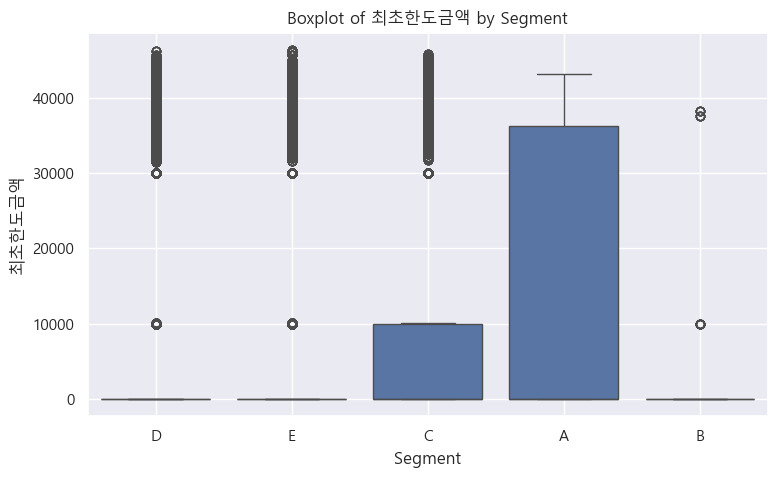


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï° ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2     meandiff  p-adj        lower        upper  reject
0      A      B  -71198.7073    0.0  -81974.0459  -60423.3687    True
1      A      C  -99581.7314    0.0 -103467.0628  -95696.4001    True
2      A      D -128277.2198    0.0 -132153.2183 -124401.2214    True
3      A      E -152350.3775    0.0 -156221.9719 -148478.7830    True
4      B      C  -28383.0241    0.0  -38444.8523  -18321.1959    True
5      B      D  -57078.5125    0.0  -67136.7406  -47020.2845    True
6      B      E  -81151.6702    0.0  -91208.2019  -71095.1384    True
7      C      D  -28695.4884    0.0  -29090.2404  -28300.7364    True
8      C      E  -52768.6460    0.0  -53117.5142  -52419.7779    True
9      D      E  -24073.1576    0.0  -24295.1326  -23851.1826    True

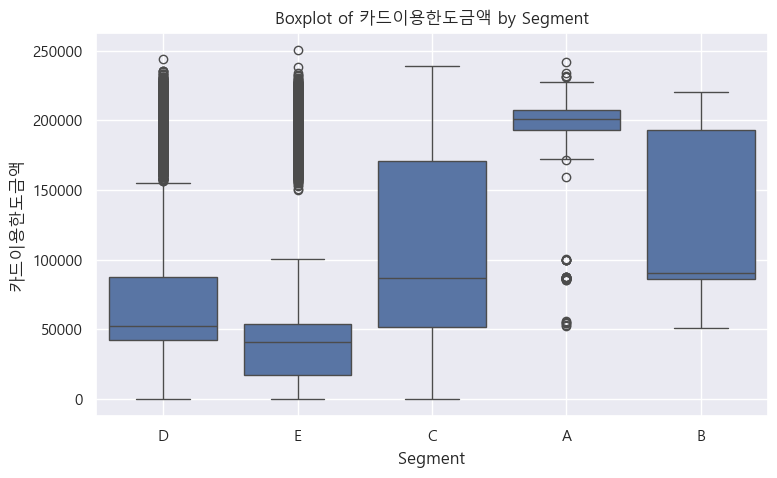


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: CAÌïúÎèÑÍ∏àÏï° ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2    meandiff  p-adj       lower       upper  reject
0      A      B -17282.7611    0.0 -20629.6358 -13935.8863    True
1      A      C -25269.1695    0.0 -26475.9732 -24062.3659    True
2      A      D -33338.1744    0.0 -34542.0791 -32134.2696    True
3      A      E -40738.9419    0.0 -41941.4788 -39536.4050    True
4      B      C  -7986.4085    0.0 -11111.6633  -4861.1536    True
5      B      D -16055.4133    0.0 -19179.5499 -12931.2767    True
6      B      E -23456.1808    0.0 -26579.7906 -20332.5711    True
7      C      D  -8069.0048    0.0  -8191.6168  -7946.3928    True
8      C      E -15469.7724    0.0 -15578.1326 -15361.4121    True
9      D      E  -7400.7675    0.0  -7469.7141  -7331.8210    True

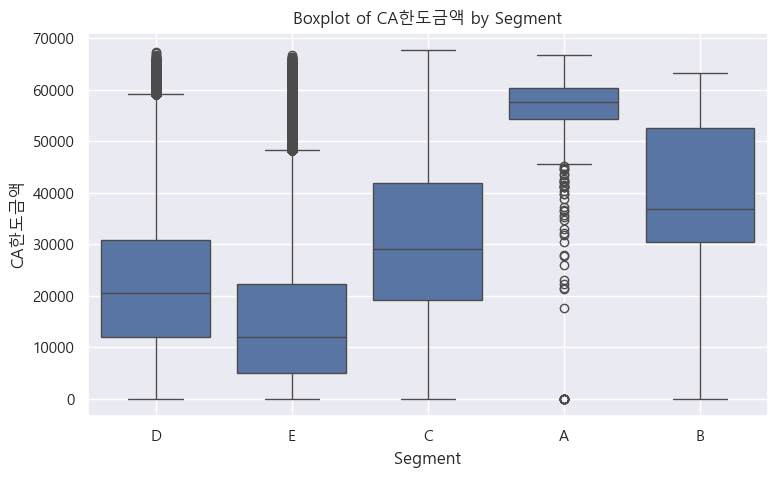


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï° ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2    meandiff   p-adj       lower       upper  reject
0      A      B -18959.4231  0.0003 -31445.7578  -6473.0884    True
1      A      C  -3617.0232  0.1828  -8119.2992    885.2528   False
2      A      D -12710.1009  0.0000 -17201.5620  -8218.6399    True
3      A      E -21561.8029  0.0000 -26048.1607 -17075.4451    True
4      B      C  15342.3999  0.0031   3682.8726  27001.9272    True
5      B      D   6249.3222  0.5869  -5406.0333  17904.6776   False
6      B      E  -2602.3798  0.9737 -14255.7696   9051.0100   False
7      C      D  -9093.0777  0.0000  -9550.5117  -8635.6438    True
8      C      E -17944.7797  0.0000 -18349.0440 -17540.5154    True
9      D      E  -8851.7020  0.0000  -9108.9240  -8594.4800    True

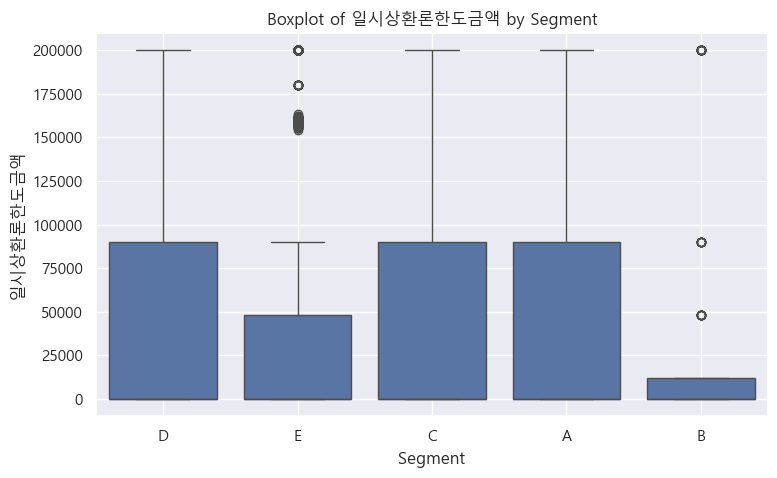


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï° ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2    meandiff   p-adj       lower       upper  reject
0      A      B -37108.1299  0.0000 -57712.0237 -16504.2361    True
1      A      C    267.1385  1.0000  -7162.1366   7696.4137   False
2      A      D  -3115.8353  0.7815 -10527.2646   4295.5940   False
3      A      E -13072.2143  0.0000 -20475.2226  -5669.2060    True
4      B      C  37375.2684  0.0000  18135.7022  56614.8346    True
5      B      D  33992.2946  0.0000  14759.6124  53224.9767    True
6      B      E  24035.9156  0.0059   4806.4770  43265.3542    True
7      C      D  -3382.9739  0.0000  -4137.7927  -2628.1550    True
8      C      E -13339.3528  0.0000 -14006.4356 -12672.2701    True
9      D      E  -9956.3790  0.0000 -10380.8250  -9531.9330    True

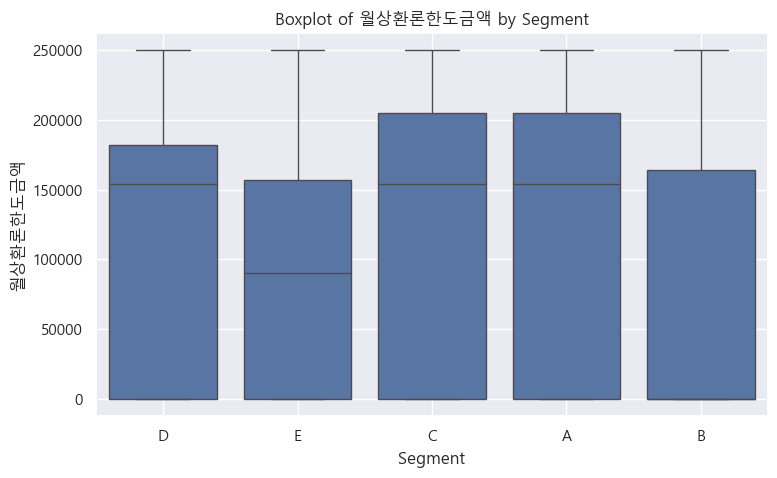


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2  meandiff   p-adj   lower   upper  reject
0      A      B    1.8308  0.0000  1.2560  2.4056    True
1      A      C   -0.1824  0.1151 -0.3896  0.0249   False
2      A      D   -0.6342  0.0000 -0.8410 -0.4274    True
3      A      E   -1.1794  0.0000 -1.3860 -0.9729    True
4      B      C   -2.0132  0.0000 -2.5499 -1.4765    True
5      B      D   -2.4650  0.0000 -3.0016 -1.9285    True
6      B      E   -3.0103  0.0000 -3.5467 -2.4738    True
7      C      D   -0.4518  0.0000 -0.4729 -0.4307    True
8      C      E   -0.9970  0.0000 -1.0157 -0.9784    True
9      D      E   -0.5452  0.0000 -0.5571 -0.5334    True

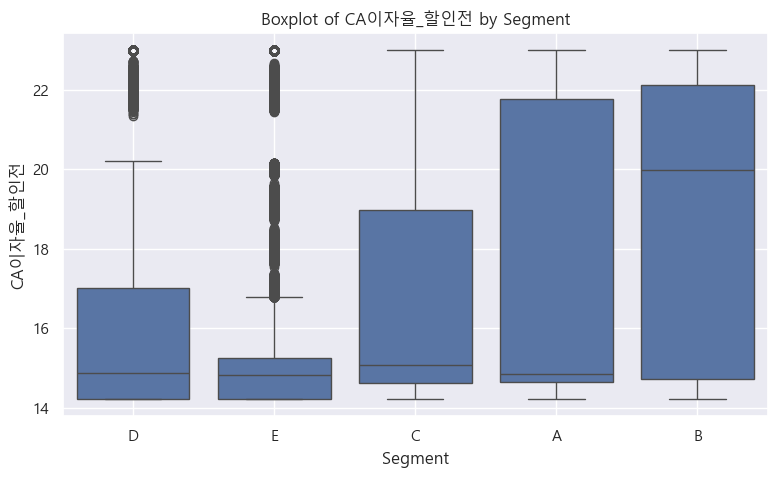


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2  meandiff   p-adj   lower   upper  reject
0      A      B    1.1628  0.0000  0.5077  1.8179    True
1      A      C   -0.1355  0.5204 -0.3717  0.1008   False
2      A      D   -0.2577  0.0238 -0.4934 -0.0221    True
3      A      E   -0.4696  0.0000 -0.7050 -0.2342    True
4      B      C   -1.2983  0.0000 -1.9100 -0.6866    True
5      B      D   -1.4206  0.0000 -2.0321 -0.8090    True
6      B      E   -1.6324  0.0000 -2.2439 -1.0210    True
7      C      D   -0.1223  0.0000 -0.1463 -0.0983    True
8      C      E   -0.3342  0.0000 -0.3554 -0.3129    True
9      D      E   -0.2119  0.0000 -0.2254 -0.1984    True

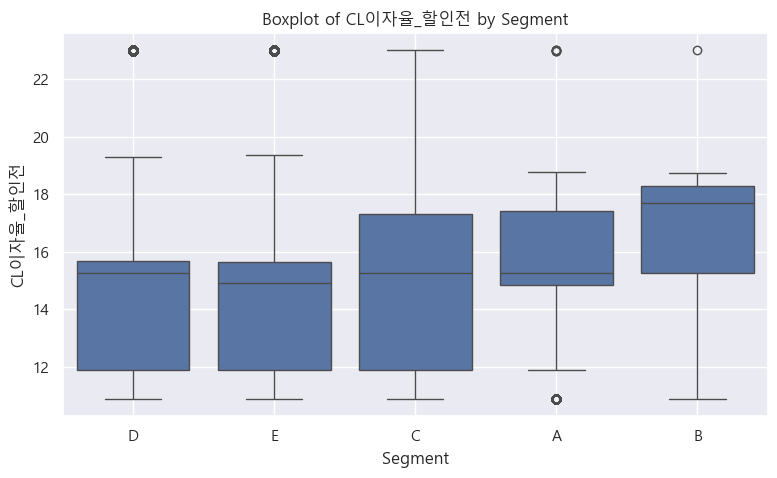


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2  meandiff   p-adj   lower   upper  reject
0      A      B    1.2884  0.0000  0.7486  1.8282    True
1      A      C    0.2287  0.0118  0.0340  0.4233    True
2      A      D    0.0854  0.7512 -0.1087  0.2796   False
3      A      E   -0.2919  0.0004 -0.4859 -0.0980    True
4      B      C   -1.0597  0.0000 -1.5638 -0.5557    True
5      B      D   -1.2030  0.0000 -1.7068 -0.6991    True
6      B      E   -1.5803  0.0000 -2.0841 -1.0765    True
7      C      D   -0.1432  0.0000 -0.1630 -0.1235    True
8      C      E   -0.5206  0.0000 -0.5381 -0.5031    True
9      D      E   -0.3774  0.0000 -0.3885 -0.3662    True

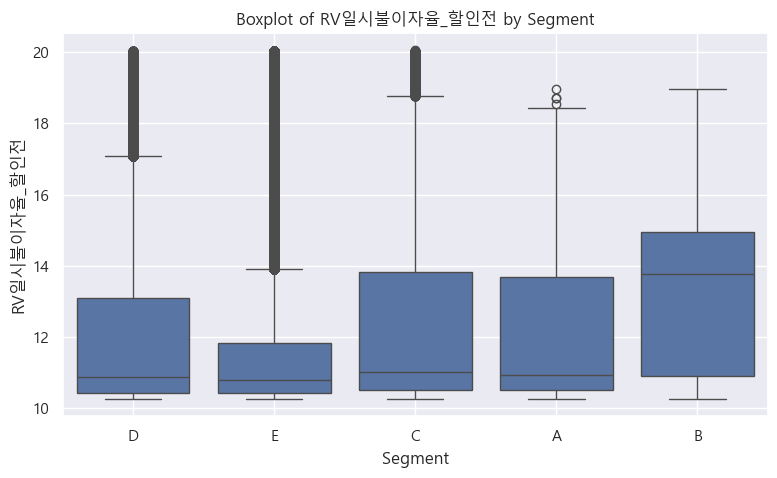


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2  meandiff   p-adj   lower   upper  reject
0      A      B    2.2265  0.0000  1.5593  2.8937    True
1      A      C    0.1128  0.7040 -0.1278  0.3534   False
2      A      D   -0.2037  0.1398 -0.4437  0.0363   False
3      A      E   -0.7756  0.0000 -1.0153 -0.5358    True
4      B      C   -2.1137  0.0000 -2.7367 -1.4906    True
5      B      D   -2.4302  0.0000 -3.0530 -1.8074    True
6      B      E   -3.0021  0.0000 -3.6248 -2.3794    True
7      C      D   -0.3166  0.0000 -0.3410 -0.2921    True
8      C      E   -0.8884  0.0000 -0.9100 -0.8668    True
9      D      E   -0.5718  0.0000 -0.5856 -0.5581    True

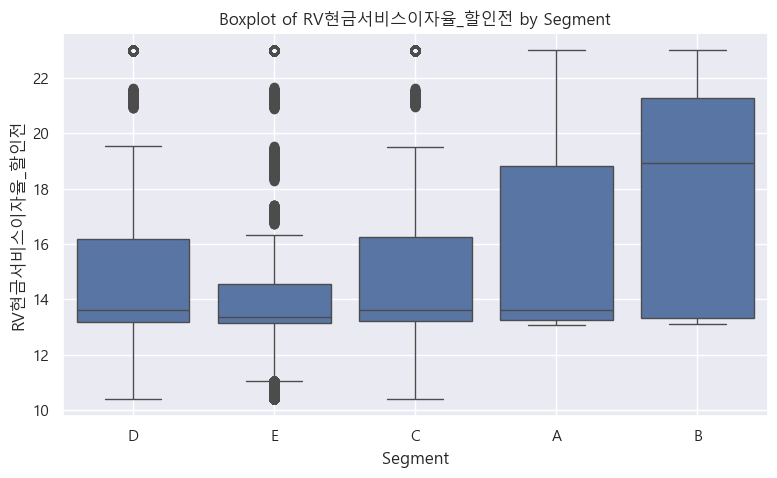


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú® ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2  meandiff   p-adj    lower    upper  reject
0      A      B   14.1805  0.0002   5.1153  23.2456    True
1      A      C    4.5232  0.0015   1.2546   7.7919    True
2      A      D    7.6106  0.0000   4.3498  10.8715    True
3      A      E    0.6508  0.9826  -2.6063   3.9079   False
4      B      C   -9.6572  0.0160 -18.1221  -1.1924    True
5      B      D   -6.5698  0.2123 -15.0317   1.8920   False
6      B      E  -13.5297  0.0001 -21.9901  -5.0693    True
7      C      D    3.0874  0.0000   2.7553   3.4195    True
8      C      E   -3.8724  0.0000  -4.1659  -3.5789    True
9      D      E   -6.9598  0.0000  -7.1466  -6.7731    True

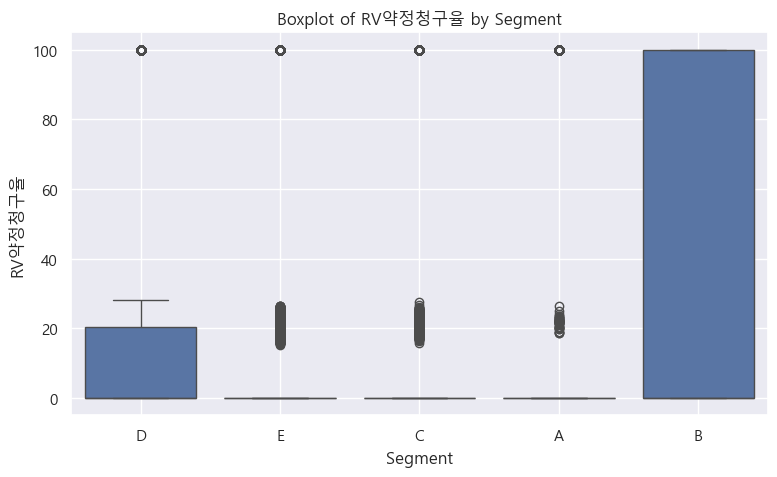


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú® ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2  meandiff   p-adj   lower   upper  reject
0      A      B    1.4738  0.0005  0.4831  2.4645    True
1      A      C    0.5447  0.0003  0.1875  0.9020    True
2      A      D    0.3283  0.0878 -0.0281  0.6846   False
3      A      E    0.0776  0.9760 -0.2784  0.4335   False
4      B      C   -0.9290  0.0484 -1.8541 -0.0039    True
5      B      D   -1.1455  0.0065 -2.0703 -0.2207    True
6      B      E   -1.3962  0.0004 -2.3208 -0.4716    True
7      C      D   -0.2165  0.0000 -0.2527 -0.1802    True
8      C      E   -0.4672  0.0000 -0.4992 -0.4351    True
9      D      E   -0.2507  0.0000 -0.2711 -0.2303    True

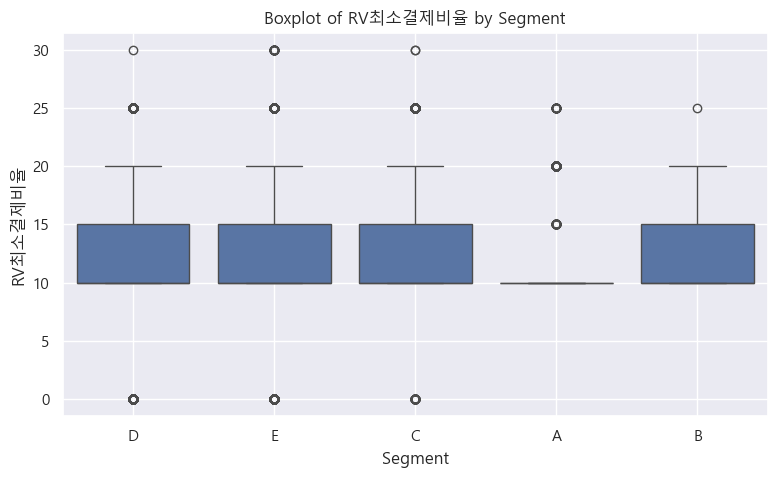


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2     meandiff  p-adj        lower        upper  reject
0      A      B  -74676.6489    0.0  -85317.1307  -64036.1672    True
1      A      C -100365.5414    0.0 -104202.2466  -96528.8362    True
2      A      D -128979.1537    0.0 -132806.6428 -125151.6646    True
3      A      E -152450.7175    0.0 -156273.8577 -148627.5773    True
4      B      C  -25688.8925    0.0  -35624.7937  -15752.9913    True
5      B      D  -54302.5048    0.0  -64234.8508  -44370.1587    True
6      B      E  -77774.0686    0.0  -87704.7396  -67843.3976    True
7      C      D  -28613.6123    0.0  -29003.4239  -28223.8007    True
8      C      E  -52085.1761    0.0  -52429.6780  -51740.6741    True
9      D      E  -23471.5638    0.0  -23690.7607  -23252.3669    True

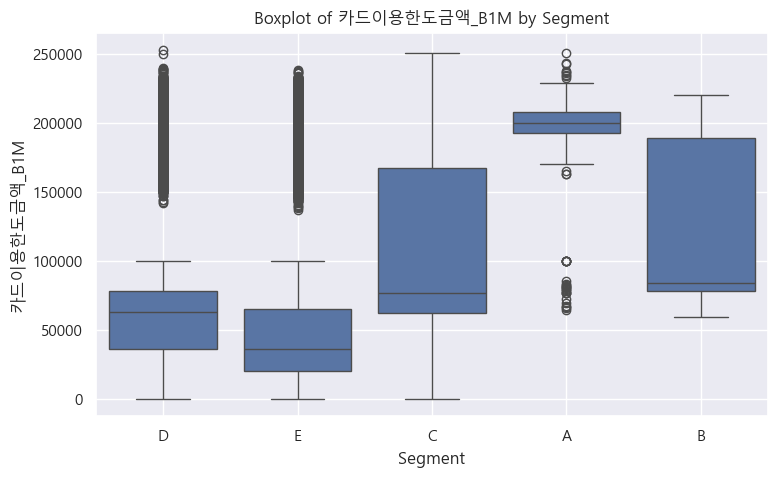


üìå Ïú†ÏùòÌïú Î≥ÄÏàò: Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...


group1 group2     meandiff  p-adj        lower        upper  reject
0      A      B  -75325.8104    0.0  -85933.9089  -64717.7120    True
1      A      C -101143.3128    0.0 -104968.3414  -97318.2843    True
2      A      D -129593.1857    0.0 -133409.0262 -125777.3452    True
3      A      E -153020.4519    0.0 -156831.9567 -149208.9470    True
4      B      C  -25817.5024    0.0  -35723.1646  -15911.8401    True
5      B      D  -54267.3753    0.0  -64169.4932  -44365.2574    True
6      B      E  -77694.6414    0.0  -87595.0894  -67794.1935    True
7      C      D  -28449.8729    0.0  -28838.4981  -28061.2477    True
8      C      E  -51877.1391    0.0  -52220.5926  -51533.6856    True
9      D      E  -23427.2662    0.0  -23645.7960  -23208.7363    True

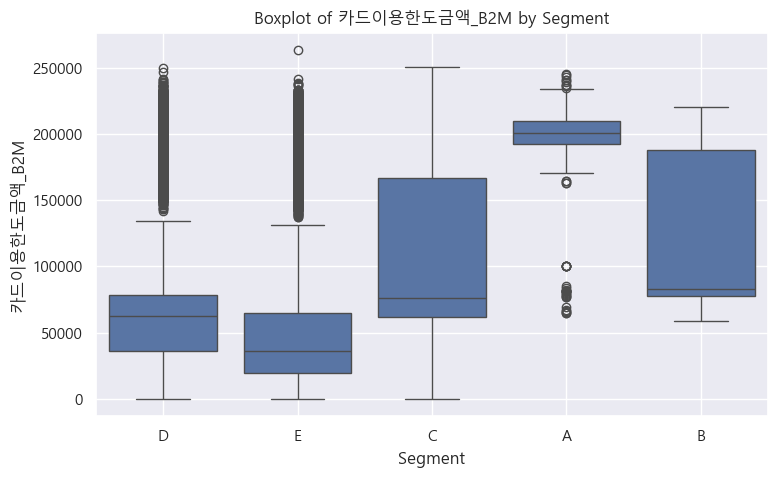

In [33]:
numerical_cols = [col for col in column1 + column2 if col != 'Segment_e']
anova_results = []
tukey_all_results = {}

for col in numerical_cols:
    try:
        fstat, pval = run_anova(all_df, 'Segment', col)
        conclusion = '‚úÖ Ïú†ÏùòÌï®' if pval < 0.05 else '‚ùå Î∂àÏ∂©Î∂Ñ'
        anova_results.append({'Î≥ÄÏàò': col, 'F-stat': round(fstat, 4), 'p-value': round(pval, 6), 'Í≤∞Î°†': conclusion})
        
        if pval < 0.05:
            print(f"\nüìå Ïú†ÏùòÌïú Î≥ÄÏàò: {col} ‚Üí Tukey HSD & Boxplot ÏßÑÌñâ Ï§ë...")
            tukey_df = run_tukey(all_df, 'Segment', col)
            tukey_all_results[col] = tukey_df  # Ï†ÄÏû•
            display(tukey_df)
            plot_box(all_df, 'Segment', col)

    except Exception as e:
        anova_results.append({'Î≥ÄÏàò': col, 'F-stat': None, 'p-value': None, 'Í≤∞Î°†': f'‚ö† Ïò§Î•ò: {e}'})
